In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from google.colab import drive
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV , KFold , train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, precision_score, recall_score
from sklearn.feature_selection import RFE



In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


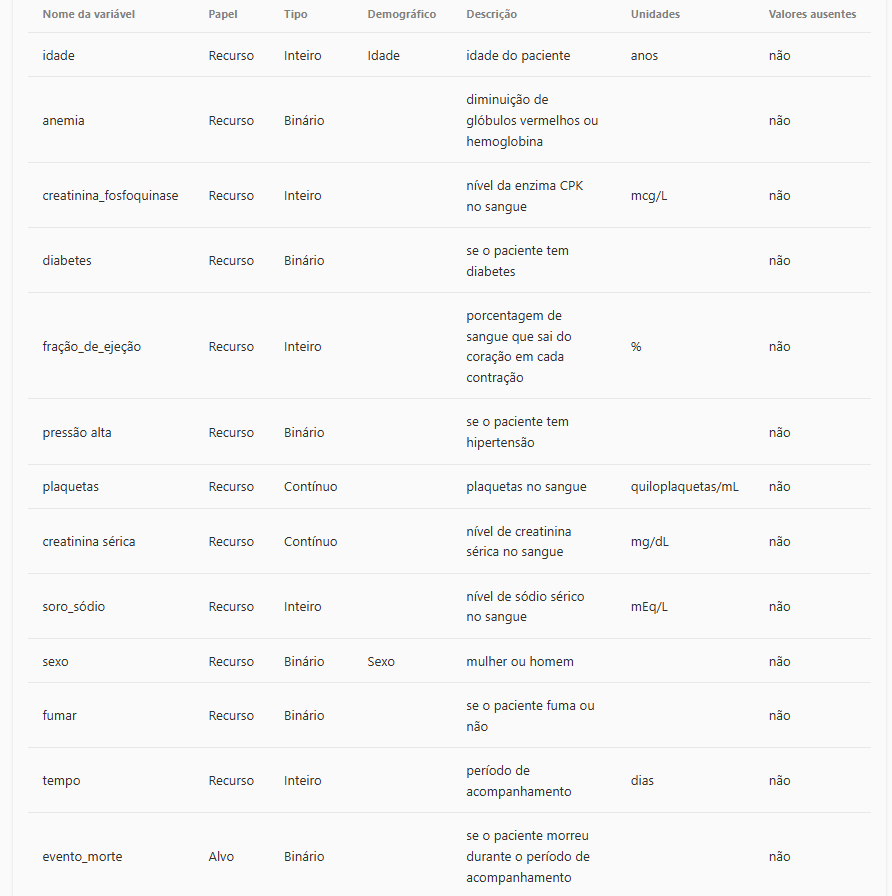

# Etapa para analise dos dados

In [ ]:
dados = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/heart_failure_clinical_records_dataset.csv')
pd.DataFrame(dados)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [ ]:
dados.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [ ]:
dados.mean(numeric_only=True)

,0
age,60.833893
anaemia,0.431438
creatinine_phosphokinase,581.839465
diabetes,0.418060
ejection_fraction,38.083612
high_blood_pressure,0.351171
platelets,263358.029264
serum_creatinine,1.393880
serum_sodium,136.625418
sex,0.648829


In [ ]:
dados.median(numeric_only=True)

,0
age,60.0
anaemia,0.0
creatinine_phosphokinase,250.0
diabetes,0.0
ejection_fraction,38.0
high_blood_pressure,0.0
platelets,262000.0
serum_creatinine,1.1
serum_sodium,137.0
sex,1.0


In [ ]:
dados.value_counts()

age   anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  smoking  time  DEATH_EVENT
95.0  1        371                       0         30                 0                    461000.00  2.00              132           1    0        50    1              1
40.0  0        90                        0         35                 0                    255000.00  1.10              136           1    1        212   0              1
               244                       0         45                 1                    275000.00  0.90              140           0    0        174   0              1
               478                       1         30                 0                    303000.00  0.90              136           1    0        148   0              1
               582                       1         35                 0                    222000.00  1.00              132           1    0        244   0              1
                                                                                                                                                                        ..
43.0  1        358                       0         50                 0                    237000.00  1.30              135           0    0        97    0              1
42.0  1        250                       1         15                 0                    213000.00  1.30              136           0    0        65    1              1
               86                        0         35                 0                    365000.00  1.10              139           1    1        201   0              1
      0        5209                      0         30                 0                    226000.00  1.00              140           1    1        87    0              1
               582                       0         60                 0                    263358.03  1.18              137           0    0        82    0              1
Name: count, Length: 299, dtype: int64

In [ ]:
dados.isnull()


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,False,False,False,False,False,False,False,False,False,False,False,False,False
295,False,False,False,False,False,False,False,False,False,False,False,False,False
296,False,False,False,False,False,False,False,False,False,False,False,False,False
297,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
dados.isnull().sum()


,0
age,0
anaemia,0
creatinine_phosphokinase,0
diabetes,0
ejection_fraction,0
high_blood_pressure,0
platelets,0
serum_creatinine,0
serum_sodium,0
sex,0


In [ ]:
# dados.duplicated()
dados.duplicated().sum()

np.int64(0)

In [ ]:
dados.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [ ]:
tabela_descritiva = dados.describe()
tabela_descritiva.to_csv('tabela_descritiva.csv')

In [ ]:
dados.min()

,0
age,40.0
anaemia,0.0
creatinine_phosphokinase,23.0
diabetes,0.0
ejection_fraction,14.0
high_blood_pressure,0.0
platelets,25100.0
serum_creatinine,0.5
serum_sodium,113.0
sex,0.0


In [ ]:
dados.max()

,0
age,95.0
anaemia,1.0
creatinine_phosphokinase,7861.0
diabetes,1.0
ejection_fraction,80.0
high_blood_pressure,1.0
platelets,850000.0
serum_creatinine,9.4
serum_sodium,148.0
sex,1.0


In [ ]:
primeiro_quartil = dados.quantile(q=0.25, axis=0, numeric_only=True)
terceiro_quartil = dados.quantile(q=0.75, axis=0, numeric_only=True)

In [ ]:
print(primeiro_quartil)

age                             51.0
anaemia                          0.0
creatinine_phosphokinase       116.5
diabetes                         0.0
ejection_fraction               30.0
high_blood_pressure              0.0
platelets                   212500.0
serum_creatinine                 0.9
serum_sodium                   134.0
sex                              0.0
smoking                          0.0
time                            73.0
DEATH_EVENT                      0.0
Name: 0.25, dtype: float64


In [ ]:
print(terceiro_quartil)

age                             70.0
anaemia                          1.0
creatinine_phosphokinase       582.0
diabetes                         1.0
ejection_fraction               45.0
high_blood_pressure              1.0
platelets                   303500.0
serum_creatinine                 1.4
serum_sodium                   140.0
sex                              1.0
smoking                          1.0
time                           203.0
DEATH_EVENT                      1.0
Name: 0.75, dtype: float64


In [ ]:
dados.var(numeric_only=True)

,0
age,1.414865e+02
anaemia,2.461224e-01
creatinine_phosphokinase,9.414586e+05
diabetes,2.441023e-01
ejection_fraction,1.400635e+02
high_blood_pressure,2.286144e-01
platelets,9.565669e+09
serum_creatinine,1.070211e+00
serum_sodium,1.946996e+01
sex,2.286144e-01


In [ ]:
dados.corr(numeric_only=True)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


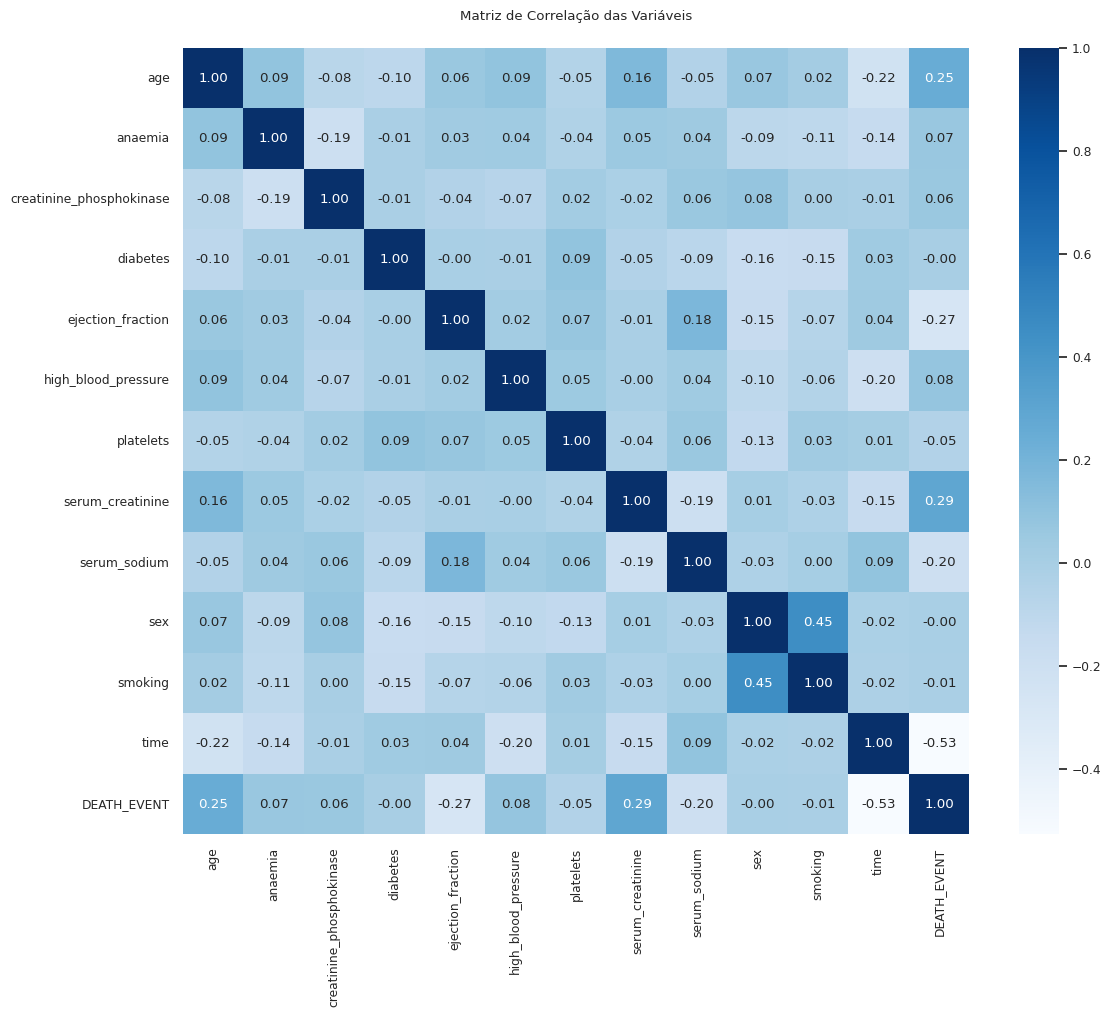

In [ ]:
correlacoes = dados.corr(numeric_only=True)
plt.figure(figsize=(12,10))
sns.set(font_scale=0.8)
heatmap = sns.heatmap(correlacoes, annot=True, cmap='Blues', fmt='.2f', square=True)
plt.title('Matriz de Correlação das Variáveis', pad=20)
plt.tight_layout()
plt.savefig('correlation_heatmap.png', bbox_inches='tight')
plt.show()

Text(0, 0.5, 'Contagem de Plaquetas')

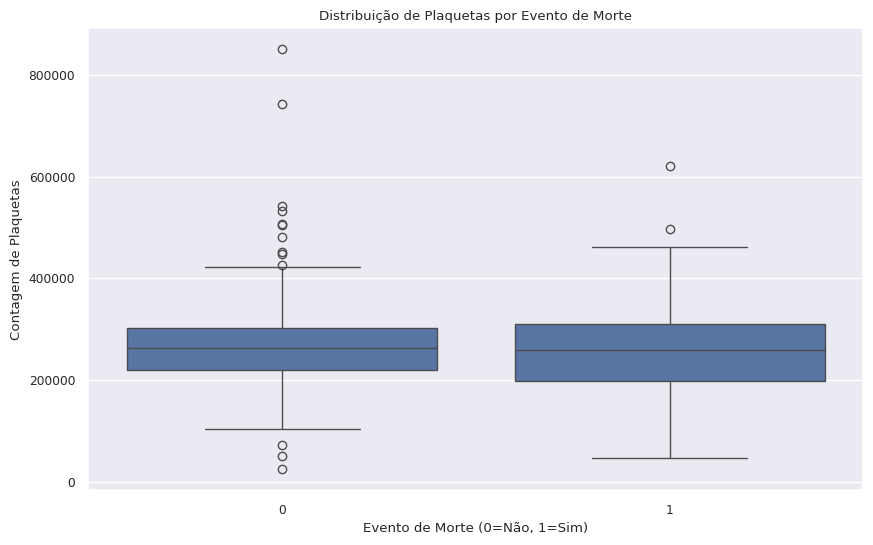

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x="DEATH_EVENT", y="platelets", data=dados)
plt.title('Distribuição de Plaquetas por Evento de Morte')
plt.xlabel('Evento de Morte (0=Não, 1=Sim)')
plt.ylabel('Contagem de Plaquetas')

<Figure size 1400x1500 with 0 Axes>

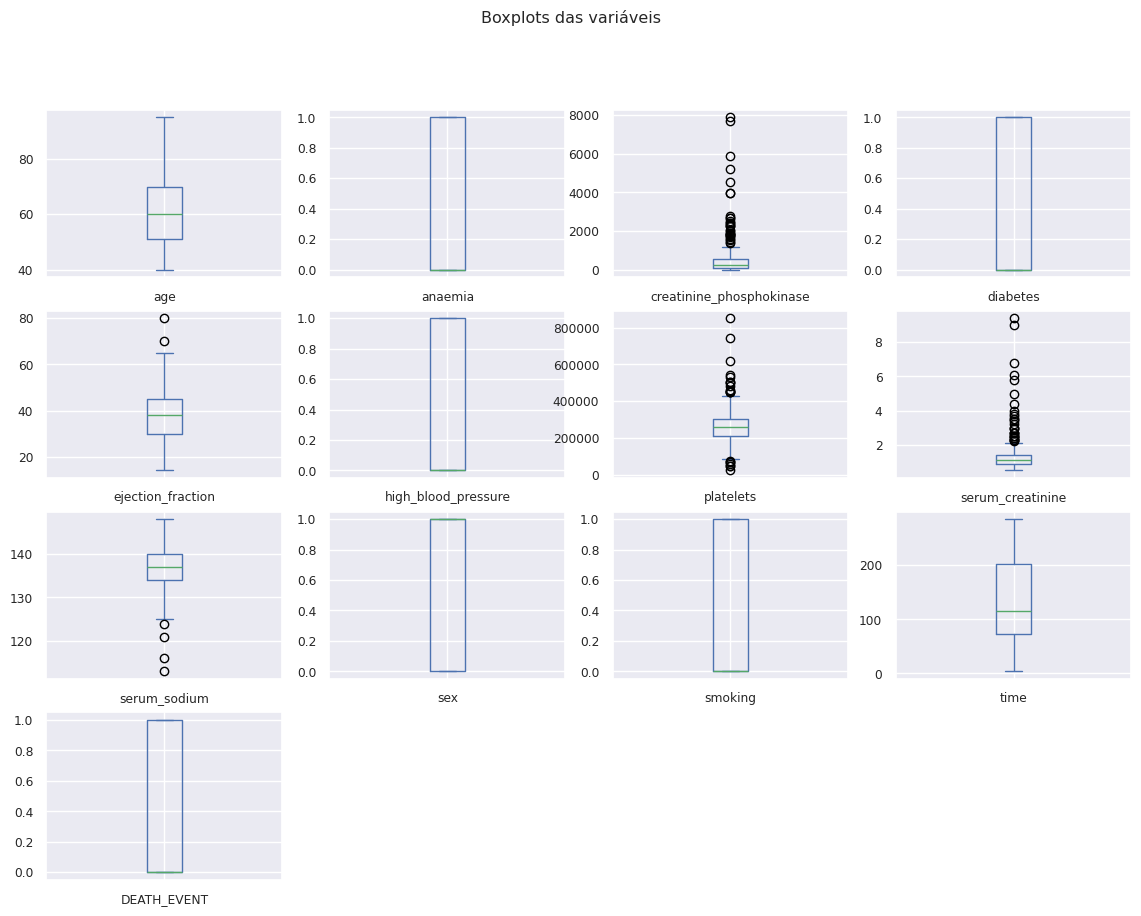

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(14,15))
dados.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(14,10))
plt.suptitle("Boxplots das variáveis")
plt.show()
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('boxplot_variaveis.png', bbox_inches='tight')
plt.show()

# Etapa de pré-processamento

In [ ]:
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [ ]:
x=dados.drop('DEATH_EVENT', axis=1)
y=dados['DEATH_EVENT']
print(x)

      age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    75.0        0                       582         0                 20   
1    55.0        0                      7861         0                 38   
2    65.0        0                       146         0                 20   
3    50.0        1                       111         0                 20   
4    65.0        1                       160         1                 20   
..    ...      ...                       ...       ...                ...   
294  62.0        0                        61         1                 38   
295  55.0        0                      1820         0                 38   
296  45.0        0                      2060         1                 60   
297  45.0        0                      2413         0                 38   
298  50.0        0                       196         0                 45   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \

In [ ]:
scaler=StandardScaler()
x_scaler=scaler.fit_transform(x)
x_scaler

array([[ 1.19294523e+00, -8.71104775e-01,  1.65728387e-04, ...,
         7.35688190e-01, -6.87681906e-01, -1.62950241e+00],
       [-4.91279276e-01, -8.71104775e-01,  7.51463953e+00, ...,
         7.35688190e-01, -6.87681906e-01, -1.60369074e+00],
       [ 3.50832977e-01, -8.71104775e-01, -4.49938761e-01, ...,
         7.35688190e-01,  1.45416070e+00, -1.59078490e+00],
       ...,
       [-1.33339153e+00, -8.71104775e-01,  1.52597865e+00, ...,
        -1.35927151e+00, -6.87681906e-01,  1.90669738e+00],
       [-1.33339153e+00, -8.71104775e-01,  1.89039811e+00, ...,
         7.35688190e-01,  1.45416070e+00,  1.93250906e+00],
       [-9.12335403e-01, -8.71104775e-01, -3.98321274e-01, ...,
         7.35688190e-01,  1.45416070e+00,  1.99703825e+00]])

In [ ]:
from scipy import stats
from sklearn import datasets
import time
from sklearn import preprocessing
from sklearn import decomposition
from sklearn import model_selection
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,f1_score,recall_score,make_scorer
from sklearn.model_selection import cross_val_score, LeaveOneOut, KFold, cross_val_predict,train_test_split, StratifiedKFold


# Definindo os classificadores

In [ ]:
def fun_ann_fs(x,*args):
  X, y, flag, n_splits, random_seed = args
  n_samples, n_var = X.shape
  n_hidden = int(round(x[2]))
  hidden_layer_sizes = tuple( int(round(x[3+i])) for i in range(n_hidden))

  activation_options = ['tanh', 'relu']
  idx = int(round(x[0]))
  idx = max(0, min(1, idx))
  activation_func = activation_options[idx]

  p={
     'activation': activation_func,
     'hidden_layer_sizes':hidden_layer_sizes,
     'alpha': x[1],

     }

  #clf = MLPClassifier(solver='lbfgs', alpha=1e-5, random_state=int(random_seed))
  clf = MLPClassifier(random_state=int(random_seed), warm_start=True,max_iter=500, early_stopping=True,n_iter_no_change=5)
  clf.set_params(**p)


  try:

    cv=KFold(n_splits=n_splits, shuffle=True, random_state=int(random_seed))
    y_p  = cross_val_predict(clf,X, y, cv=cv, n_jobs=-1)

    r =  -accuracy_score(y,y_p)

    #print(r,'\t',p,)#'\t',ft)
  except:
    y_p=[None]
    r=1e12


  #print(r,'\t',p,)#'\t',ft)
  if flag=='eval':
      return r
  else:
    return {'Y_TRUE':y, 'Y_PRED':y_p, 'BEST_PARAMS':p, 'PARAMS':x, 'EST_NAME':'ANN',
              'ESTIMATOR':clf,  'DATA':X, 'SEED':random_seed}



In [ ]:
def fun_random_florest(x,*args):
  X, y, flag, n_splits, random_seed = args
  n_samples, n_var = X.shape
  clf = RandomForestClassifier(random_state=int(random_seed), n_jobs=-1)

  p = {
        'n_estimators': int(x[0]),
        'max_depth': int(x[1]),
        'min_samples_split': int(x[2]),
    }

  clf.set_params(**p)

  try:

    cv=KFold(n_splits=n_splits, shuffle=True, random_state=int(random_seed))
    y_p  = cross_val_predict(clf,X, y, cv=cv, n_jobs=-1)

    r =  -accuracy_score(y,y_p)

  except:
    y_p=[None]
    r=1e12

  if flag=='eval':
      return r
  else:
    return {'Y_TRUE':y, 'Y_PRED':y_p, 'BEST_PARAMS':p, 'PARAMS':x, 'EST_NAME':'DT',
              'ESTIMATOR':clf, 'DATA':X, 'SEED':random_seed}


##  para a base original sem balanceamento

In [ ]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
y=le.fit_transform(y)
dataset_name='heart_failure_clinical_records_dataset'

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_scaler, y, test_size=0.20)

In [ ]:
dftrain=pd.DataFrame(x_train, columns=x.columns)
dftrain['Class'] = y_train
dftrain.to_csv('dftrain.csv', index=False)
dftrain


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,Class
0,-1.586025,1.147968,-0.511880,-0.847579,-0.260991,-0.735688,1.040981,-0.284552,0.539054,0.735688,1.454161,0.912948,0
1,1.192945,1.147968,-0.517041,-0.847579,-0.007077,1.359272,1.071706,2.523407,-1.277026,0.735688,1.454161,-1.552067,1
2,0.350833,1.147968,-0.468521,1.179830,-0.684180,1.359272,0.344549,0.199578,-0.141976,-1.359272,-0.687682,-1.423009,1
3,0.350833,1.147968,-0.539753,1.179830,1.854958,-0.735688,-0.935657,-0.478205,0.085034,-1.359272,-0.687682,-0.300201,0
4,-0.491279,-0.871105,-0.253792,-0.847579,0.585389,1.359272,0.621074,-0.478205,0.766064,-1.359272,-0.687682,-0.726094,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,-1.249180,1.147968,-0.300248,-0.847579,-0.260991,-0.735688,0.866873,-0.478205,0.766064,-1.359272,-0.687682,-0.274389,0
235,-1.333392,1.147968,-0.532527,1.179830,-1.107370,-0.735688,-0.310916,-0.575031,-0.368986,0.735688,-0.687682,1.287217,0
236,-0.070223,-0.871105,-0.539753,-0.847579,-1.107370,1.359272,-0.525991,2.039276,-0.141976,0.735688,1.454161,0.732266,0
237,0.771889,-0.871105,0.037330,-0.847579,-0.260991,-0.735688,0.651799,-0.284552,1.220084,-1.359272,-0.687682,1.480805,0


In [ ]:
dftest=pd.DataFrame(x_test, columns=x.columns)
dftest['Class'] = y_test
dftest.to_csv('dftest.csv', index=False)
dftest

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,Class
0,-0.070223,-0.871105,0.325356,1.179830,0.585389,-0.735688,3.445492e-01,-0.381379,-0.823006,0.735688,-0.687682,-0.648659,0
1,0.350833,1.147968,-0.285795,-0.847579,-1.107370,-0.735688,3.547908e-01,-0.284552,0.993074,0.735688,-0.687682,-0.558318,0
2,-1.754448,1.147968,-0.496394,-0.847579,0.162199,-0.735688,-3.826077e-01,-0.575031,0.993074,-1.359272,-0.687682,0.732266,0
3,-0.828124,-0.871105,0.823981,-0.847579,-1.107370,1.359272,7.826636e-02,-0.478205,-1.504036,0.735688,-0.687682,-1.190704,1
4,0.771889,-0.871105,2.181521,1.179830,0.162199,-0.735688,-2.289830e-01,-0.381379,0.085034,0.735688,-0.687682,1.506616,0
5,-0.070223,-0.871105,-0.530462,-0.847579,-1.530560,-0.735688,-1.478464e+00,1.458319,-2.185066,0.735688,1.454161,-0.855152,1
6,-0.238646,1.147968,-0.450971,-0.847579,-1.107370,-0.735688,-4.542993e-01,-0.187726,0.085034,0.735688,1.454161,0.512867,1
7,0.350833,-0.871105,-0.428259,-0.847579,-0.684180,-0.735688,-4.463340e-02,-0.575031,0.312044,-1.359272,-0.687682,0.719360,0
8,1.192945,1.147968,-0.391095,1.179830,-0.007077,1.359272,2.011661e-01,-0.768683,-1.277026,0.735688,1.454161,-0.726094,0
9,1.192945,1.147968,-0.346704,-0.847579,-1.953749,-0.735688,-1.396531e+00,-0.187726,0.085034,0.735688,-0.687682,-1.552067,1


In [ ]:
Xtest = dftest.drop(columns=['Class'])
ytest = dftest['Class']

In [ ]:
Xt=pd.read_csv('/content/dftrain.csv')
yt=pd.read_csv('/content/dftrain.csv')

In [ ]:
import pandas as pd
Xt = pd.read_csv('/content/dftrain.csv')
yt = pd.read_csv('/content/dftrain.csv', usecols=['Class'])


print("Total NaNs (X):", Xt.isnull().sum().sum())
Xt.isnull().sum()


Xt.info()
yt['Class'].value_counts()


Total NaNs (X): 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239 entries, 0 to 238
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       239 non-null    float64
 1   anaemia                   239 non-null    float64
 2   creatinine_phosphokinase  239 non-null    float64
 3   diabetes                  239 non-null    float64
 4   ejection_fraction         239 non-null    float64
 5   high_blood_pressure       239 non-null    float64
 6   platelets                 239 non-null    float64
 7   serum_creatinine          239 non-null    float64
 8   serum_sodium              239 non-null    float64
 9   sex                       239 non-null    float64
 10  smoking                   239 non-null    float64
 11  time                      239 non-null    float64
 12  Class                     239 non-null    int64  
dtypes: float64(12), int64(1)
memory usage: 24.4 KB


,count
Class,
0,165
1,74


In [ ]:
Xt.dropna(inplace=True)
yt.dropna(inplace=True)

In [ ]:
Xt

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,Class
0,-1.586025,1.147968,-0.511880,-0.847579,-0.260991,-0.735688,1.040981,-0.284552,0.539054,0.735688,1.454161,0.912948,0
1,1.192945,1.147968,-0.517041,-0.847579,-0.007077,1.359272,1.071706,2.523407,-1.277026,0.735688,1.454161,-1.552067,1
2,0.350833,1.147968,-0.468521,1.179830,-0.684180,1.359272,0.344549,0.199578,-0.141976,-1.359272,-0.687682,-1.423009,1
3,0.350833,1.147968,-0.539753,1.179830,1.854958,-0.735688,-0.935657,-0.478205,0.085034,-1.359272,-0.687682,-0.300201,0
4,-0.491279,-0.871105,-0.253792,-0.847579,0.585389,1.359272,0.621074,-0.478205,0.766064,-1.359272,-0.687682,-0.726094,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,-1.249180,1.147968,-0.300248,-0.847579,-0.260991,-0.735688,0.866873,-0.478205,0.766064,-1.359272,-0.687682,-0.274389,0
235,-1.333392,1.147968,-0.532527,1.179830,-1.107370,-0.735688,-0.310916,-0.575031,-0.368986,0.735688,-0.687682,1.287217,0
236,-0.070223,-0.871105,-0.539753,-0.847579,-1.107370,1.359272,-0.525991,2.039276,-0.141976,0.735688,1.454161,0.732266,0
237,0.771889,-0.871105,0.037330,-0.847579,-0.260991,-0.735688,0.651799,-0.284552,1.220084,-1.359272,-0.687682,1.480805,0


In [ ]:
xt_drop=Xt.drop(columns=['Class'])
xt_drop

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,-1.586025,1.147968,-0.511880,-0.847579,-0.260991,-0.735688,1.040981,-0.284552,0.539054,0.735688,1.454161,0.912948
1,1.192945,1.147968,-0.517041,-0.847579,-0.007077,1.359272,1.071706,2.523407,-1.277026,0.735688,1.454161,-1.552067
2,0.350833,1.147968,-0.468521,1.179830,-0.684180,1.359272,0.344549,0.199578,-0.141976,-1.359272,-0.687682,-1.423009
3,0.350833,1.147968,-0.539753,1.179830,1.854958,-0.735688,-0.935657,-0.478205,0.085034,-1.359272,-0.687682,-0.300201
4,-0.491279,-0.871105,-0.253792,-0.847579,0.585389,1.359272,0.621074,-0.478205,0.766064,-1.359272,-0.687682,-0.726094
...,...,...,...,...,...,...,...,...,...,...,...,...
234,-1.249180,1.147968,-0.300248,-0.847579,-0.260991,-0.735688,0.866873,-0.478205,0.766064,-1.359272,-0.687682,-0.274389
235,-1.333392,1.147968,-0.532527,1.179830,-1.107370,-0.735688,-0.310916,-0.575031,-0.368986,0.735688,-0.687682,1.287217
236,-0.070223,-0.871105,-0.539753,-0.847579,-1.107370,1.359272,-0.525991,2.039276,-0.141976,0.735688,1.454161,0.732266
237,0.771889,-0.871105,0.037330,-0.847579,-0.260991,-0.735688,0.651799,-0.284552,1.220084,-1.359272,-0.687682,1.480805


In [ ]:
yt

,Class
0,0
1,1
2,1
3,0
4,0
...,...
234,0
235,0
236,0
237,0


In [ ]:
from scipy.optimize import differential_evolution as de


n_splits = 5
list_results=[]

for run in range(30):
        random_seed=run*10+100

        lb_rdf = [5, 2, 2]
        ub_rdf = [30, 10, 10]

        lb_ann = [0.0, 0.0001, 1,  5,  5,  5]
        ub_ann = [1.0, 0.1,    2, 15, 15, 15]



        print('='*80+'\n'+dataset_name+'\n'+'='*80+'\n')


        args = (xt_drop, yt['Class'], 'eval', n_splits, random_seed)

        optimizers=[

            ('DT'  , lb_rdf, ub_rdf, fun_random_florest, args, random_seed,),
            ('ANN'  , lb_ann, ub_ann, fun_ann_fs, args, random_seed,),
            ]

        for (clf_name, lb, ub, fun, args, random_seed) in optimizers:
            print(clf_name, fun, random_seed)


            res = de(func=fun, bounds=tuple(zip(lb,ub)), args=args, maxiter=10, popsize=10, seed=run, disp=True, polish=False)
            xopt, fopt = res['x'], res['fun']

            print(run, fopt, xopt)

            sim = fun(xopt, *(xt_drop, yt['Class'], 'run', n_splits, random_seed))

            sim['Y_TRUE'] = sim['Y_TRUE']
            sim['Y_PRED'] = sim['Y_PRED']
            sim['RUN']=run
            sim['ACCURACY'] = accuracy_score(sim['Y_TRUE'], sim['Y_PRED'])
            sim['F1'] = f1_score(sim['Y_TRUE'], sim['Y_PRED'], average ='weighted')
            sim['RECALL'] = recall_score(sim['Y_TRUE'], sim['Y_PRED'], average ='weighted')


            list_results.append(sim)

data = pd.DataFrame(list_results)
data.to_csv("resultados.csv",index=False)

heart_failure_clinical_records_dataset

DT <function fun_random_florest at 0x7cb48c235940> 100
differential_evolution step 1: f(x)= -0.8535564853556485
differential_evolution step 2: f(x)= -0.8535564853556485
differential_evolution step 3: f(x)= -0.8619246861924686
0 -0.8619246861924686 [11.03768675  5.45275994  7.33934208]
ANN <function fun_ann_fs at 0x7cb48c234680> 100
differential_evolution step 1: f(x)= -0.6903765690376569
differential_evolution step 2: f(x)= -0.694560669456067
differential_evolution step 3: f(x)= -0.694560669456067
differential_evolution step 4: f(x)= -0.7280334728033473
differential_evolution step 5: f(x)= -0.7280334728033473
differential_evolution step 6: f(x)= -0.7280334728033473
differential_evolution step 7: f(x)= -0.7280334728033473
differential_evolution step 8: f(x)= -0.7280334728033473
differential_evolution step 9: f(x)= -0.7280334728033473
differential_evolution step 10: f(x)= -0.7280334728033473
0 -0.7280334728033473 [ 0.01631685  0.017474    1.9526011

In [ ]:
resultados = pd.read_csv("resultados.csv")

In [ ]:
resultados

,Y_TRUE,Y_PRED,BEST_PARAMS,PARAMS,EST_NAME,ESTIMATOR,DATA,SEED,RUN,ACCURACY,F1,RECALL
0,0 0\n1 1\n2 1\n3 0\n4 ...,[0 1 1 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0...,"{'n_estimators': 11, 'max_depth': 5, 'min_samp...",[11.03768675 5.45275994 7.33934208],DT,"RandomForestClassifier(max_depth=5, min_sample...",age anaemia creatinine_phosphokin...,100,0,0.861925,0.857140,0.861925
1,0 0\n1 1\n2 1\n3 0\n4 ...,[0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 1 0 0 0...,"{'activation': 'tanh', 'hidden_layer_sizes': (...",[ 0.01631685 0.017474 1.95260118 9.064927...,ANN,"MLPClassifier(activation='tanh', alpha=np.floa...",age anaemia creatinine_phosphokin...,100,0,0.728033,0.707975,0.728033
2,0 0\n1 1\n2 1\n3 0\n4 ...,[0 1 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0...,"{'n_estimators': 10, 'max_depth': 3, 'min_samp...",[10.14311214 3.47522023 4.48653462],DT,"RandomForestClassifier(max_depth=3, min_sample...",age anaemia creatinine_phosphokin...,110,1,0.861925,0.855515,0.861925
3,0 0\n1 1\n2 1\n3 0\n4 ...,[0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0...,"{'activation': 'tanh', 'hidden_layer_sizes': (...",[ 0.24036127 0.07897456 1.54300651 10.301036...,ANN,"MLPClassifier(activation='tanh', alpha=np.floa...",age anaemia creatinine_phosphokin...,110,1,0.732218,0.674130,0.732218
4,0 0\n1 1\n2 1\n3 0\n4 ...,[0 1 1 0 0 0 0 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0...,"{'n_estimators': 9, 'max_depth': 2, 'min_sampl...",[9.82111262 2.00691366 9.56023251],DT,"RandomForestClassifier(max_depth=2, min_sample...",age anaemia creatinine_phosphokin...,120,2,0.857741,0.851571,0.857741
5,0 0\n1 1\n2 1\n3 0\n4 ...,[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0...,"{'activation': 'relu', 'hidden_layer_sizes': (...",[ 0.8058869 0.05290672 1.53668071 8.860244...,ANN,MLPClassifier(alpha=np.float64(0.0529067188953...,age anaemia creatinine_phosphokin...,120,2,0.715481,0.645068,0.715481
6,0 0\n1 1\n2 1\n3 0\n4 ...,[0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0...,"{'n_estimators': 13, 'max_depth': 5, 'min_samp...",[13.8256482 5.57507198 2.74598063],DT,"RandomForestClassifier(max_depth=5, n_estimato...",age anaemia creatinine_phosphokin...,130,3,0.832636,0.828188,0.832636
7,0 0\n1 1\n2 1\n3 0\n4 ...,[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0...,"{'activation': 'relu', 'hidden_layer_sizes': (...",[ 0.52333783 0.0455733 1.62165947 11.772754...,ANN,MLPClassifier(alpha=np.float64(0.0455733011037...,age anaemia creatinine_phosphokin...,130,3,0.757322,0.730255,0.757322
8,0 0\n1 1\n2 1\n3 0\n4 ...,[0 1 1 0 0 0 0 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0...,"{'n_estimators': 23, 'max_depth': 9, 'min_samp...",[23.10095179 9.70830711 7.23994618],DT,"RandomForestClassifier(max_depth=9, min_sample...",age anaemia creatinine_phosphokin...,140,4,0.828452,0.826733,0.828452
9,0 0\n1 1\n2 1\n3 0\n4 ...,[0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0...,"{'activation': 'relu', 'hidden_layer_sizes': (...",[ 0.78257858 0.06883114 1.90737223 11.999593...,ANN,MLPClassifier(alpha=np.float64(0.0688311376127...,age anaemia creatinine_phosphokin...,140,4,0.723849,0.695566,0.723849


In [ ]:
df_dt = resultados[resultados["EST_NAME"] == 'DT']

In [ ]:
df_ann = resultados[resultados["EST_NAME"] == 'ANN']

In [ ]:
df_dt["ACCURACY"].mean()

np.float64(0.8465829846582988)

In [ ]:
df_ann["ACCURACY"].mean()

np.float64(0.7341701534170152)

In [ ]:
df_dt.sort_values(by=["ACCURACY"],ascending=False)

,Y_TRUE,Y_PRED,BEST_PARAMS,PARAMS,EST_NAME,ESTIMATOR,DATA,SEED,RUN,ACCURACY,F1,RECALL
0,0 0\n1 1\n2 1\n3 0\n4 ...,[0 1 1 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0...,"{'n_estimators': 11, 'max_depth': 5, 'min_samp...",[11.03768675 5.45275994 7.33934208],DT,"RandomForestClassifier(max_depth=5, min_sample...",age anaemia creatinine_phosphokin...,100,0,0.861925,0.857140,0.861925
2,0 0\n1 1\n2 1\n3 0\n4 ...,[0 1 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0...,"{'n_estimators': 10, 'max_depth': 3, 'min_samp...",[10.14311214 3.47522023 4.48653462],DT,"RandomForestClassifier(max_depth=3, min_sample...",age anaemia creatinine_phosphokin...,110,1,0.861925,0.855515,0.861925
24,0 0\n1 1\n2 1\n3 0\n4 ...,[0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0...,"{'n_estimators': 17, 'max_depth': 6, 'min_samp...",[17.85337704 6.70298667 7.73139661],DT,"RandomForestClassifier(max_depth=6, min_sample...",age anaemia creatinine_phosphokin...,220,12,0.861925,0.857893,0.861925
4,0 0\n1 1\n2 1\n3 0\n4 ...,[0 1 1 0 0 0 0 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0...,"{'n_estimators': 9, 'max_depth': 2, 'min_sampl...",[9.82111262 2.00691366 9.56023251],DT,"RandomForestClassifier(max_depth=2, min_sample...",age anaemia creatinine_phosphokin...,120,2,0.857741,0.851571,0.857741
50,0 0\n1 1\n2 1\n3 0\n4 ...,[0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0...,"{'n_estimators': 15, 'max_depth': 5, 'min_samp...",[15.46603505 5.01061449 7.52334713],DT,"RandomForestClassifier(max_depth=5, min_sample...",age anaemia creatinine_phosphokin...,350,25,0.857741,0.853204,0.857741
36,0 0\n1 1\n2 1\n3 0\n4 ...,[0 1 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0...,"{'n_estimators': 22, 'max_depth': 7, 'min_samp...",[22.22065123 7.20417173 8.75364365],DT,"RandomForestClassifier(max_depth=7, min_sample...",age anaemia creatinine_phosphokin...,280,18,0.857741,0.854678,0.857741
52,0 0\n1 1\n2 1\n3 0\n4 ...,[0 1 1 0 0 0 0 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0...,"{'n_estimators': 27, 'max_depth': 8, 'min_samp...",[27.31629766 8.05608832 6.24167367],DT,"RandomForestClassifier(max_depth=8, min_sample...",age anaemia creatinine_phosphokin...,360,26,0.857741,0.853960,0.857741
54,0 0\n1 1\n2 1\n3 0\n4 ...,[0 1 1 0 0 0 0 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0...,"{'n_estimators': 10, 'max_depth': 4, 'min_samp...",[10.12588356 4.48151549 6.67518993],DT,"RandomForestClassifier(max_depth=4, min_sample...",age anaemia creatinine_phosphokin...,370,27,0.853556,0.849281,0.853556
14,0 0\n1 1\n2 1\n3 0\n4 ...,[0 1 1 0 0 0 0 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0...,"{'n_estimators': 18, 'max_depth': 3, 'min_samp...",[18.77908741 3.46546069 6.24171287],DT,"RandomForestClassifier(max_depth=3, min_sample...",age anaemia creatinine_phosphokin...,170,7,0.853556,0.846758,0.853556
16,0 0\n1 1\n2 1\n3 0\n4 ...,[0 1 1 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0...,"{'n_estimators': 24, 'max_depth': 5, 'min_samp...",[24.58390908 5.02071073 6.24027203],DT,"RandomForestClassifier(max_depth=5, min_sample...",age anaemia creatinine_phosphokin...,180,8,0.853556,0.851442,0.853556


In [ ]:
df_ann.sort_values(by=["ACCURACY"],ascending=False)

,Y_TRUE,Y_PRED,BEST_PARAMS,PARAMS,EST_NAME,ESTIMATOR,DATA,SEED,RUN,ACCURACY,F1,RECALL
33,0 0\n1 1\n2 1\n3 0\n4 ...,[0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0...,"{'activation': 'relu', 'hidden_layer_sizes': (...",[ 0.51049069 0.0587453 1.63551231 12.087626...,ANN,MLPClassifier(alpha=np.float64(0.0587453016134...,age anaemia creatinine_phosphokin...,260,16,0.774059,0.771303,0.774059
21,0 0\n1 1\n2 1\n3 0\n4 ...,[0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0...,"{'activation': 'tanh', 'hidden_layer_sizes': (...",[ 0.02939511 0.07932856 1.50815189 9.808084...,ANN,"MLPClassifier(activation='tanh', alpha=np.floa...",age anaemia creatinine_phosphokin...,200,10,0.761506,0.743916,0.761506
23,0 0\n1 1\n2 1\n3 0\n4 ...,[0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0...,"{'activation': 'tanh', 'hidden_layer_sizes': (...",[ 0.09398678 0.07406967 1.85179311 14.618652...,ANN,"MLPClassifier(activation='tanh', alpha=np.floa...",age anaemia creatinine_phosphokin...,210,11,0.761506,0.743916,0.761506
7,0 0\n1 1\n2 1\n3 0\n4 ...,[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0...,"{'activation': 'relu', 'hidden_layer_sizes': (...",[ 0.52333783 0.0455733 1.62165947 11.772754...,ANN,MLPClassifier(alpha=np.float64(0.0455733011037...,age anaemia creatinine_phosphokin...,130,3,0.757322,0.730255,0.757322
17,0 0\n1 1\n2 1\n3 0\n4 ...,[0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0...,"{'activation': 'tanh', 'hidden_layer_sizes': (...",[ 0.03432558 0.04869812 1.91162726 6.618053...,ANN,"MLPClassifier(activation='tanh', alpha=np.floa...",age anaemia creatinine_phosphokin...,180,8,0.753138,0.736743,0.753138
37,0 0\n1 1\n2 1\n3 0\n4 ...,[0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0...,"{'activation': 'relu', 'hidden_layer_sizes': (...",[ 0.64372706 0.07122492 1.64285948 14.427532...,ANN,MLPClassifier(alpha=np.float64(0.0712249229099...,age anaemia creatinine_phosphokin...,280,18,0.748954,0.727502,0.748954
15,0 0\n1 1\n2 1\n3 0\n4 ...,[0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0...,"{'activation': 'tanh', 'hidden_layer_sizes': (...",[ 0.39247629 0.08687491 1.90301221 14.140769...,ANN,"MLPClassifier(activation='tanh', alpha=np.floa...",age anaemia creatinine_phosphokin...,170,7,0.744770,0.750437,0.744770
31,0 0\n1 1\n2 1\n3 0\n4 ...,[0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0...,"{'activation': 'tanh', 'hidden_layer_sizes': (...",[ 0.07431555 0.07740751 1.64545308 14.599056...,ANN,"MLPClassifier(activation='tanh', alpha=np.floa...",age anaemia creatinine_phosphokin...,250,15,0.740586,0.714017,0.740586
53,0 0\n1 1\n2 1\n3 0\n4 ...,[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...,"{'activation': 'relu', 'hidden_layer_sizes': (...",[ 0.66832696 0.02051631 1.51982349 14.170472...,ANN,MLPClassifier(alpha=np.float64(0.0205163063339...,age anaemia creatinine_phosphokin...,360,26,0.740586,0.691475,0.740586
55,0 0\n1 1\n2 1\n3 0\n4 ...,[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0...,"{'activation': 'relu', 'hidden_layer_sizes': (...",[ 0.768851 0.0691332 1.69168015 8.934988...,ANN,MLPClassifier(alpha=np.float64(0.0691332023775...,age anaemia creatinine_phosphokin...,370,27,0.736402,0.669019,0.736402


In [ ]:
melhor_parametro_dt = resultados[resultados["EST_NAME"] == "DT"].sort_values(by="ACCURACY", ascending=False).iloc[0]
melhor_parametro_dt.loc['BEST_PARAMS']

"{'n_estimators': 11, 'max_depth': 5, 'min_samples_split': 7}"

In [ ]:
melhor_parametro_ann = resultados[resultados["EST_NAME"] == "ANN"].sort_values(by="ACCURACY", ascending=False).iloc[0]
melhor_parametro_ann.loc['BEST_PARAMS']

"{'activation': 'relu', 'hidden_layer_sizes': (12, 15), 'alpha': np.float64(0.05874530161343984)}"

In [ ]:
from scipy.stats import wilcoxon

In [ ]:
t_dt,p_dt = wilcoxon(df_dt["ACCURACY"].values,df_ann["ACCURACY"].values)

In [ ]:
t_ANN,p_ANN = wilcoxon(df_ann["ACCURACY"].values,df_ann["ACCURACY"].values)

/usr/local/lib/python3.12/dist-packages/scipy/stats/_wilcoxon.py:178: RuntimeWarning: invalid value encountered in scalar divide
  z = (r_plus - mn) / se


In [ ]:
p_dt

np.float64(1.7105279932400777e-06)

In [ ]:
p_ANN

np.float64(nan)

In [ ]:
Xtrain = pd.read_csv('dftrain.csv')
ytrain = pd.read_csv('dftrain.csv', usecols=['Class'])
Xtest = pd.read_csv('dftest.csv')
ytest = pd.read_csv('dftest.csv', usecols=['Class'])

In [ ]:
X_test=Xtest.drop(columns=['Class'])
X_test

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,-0.070223,-0.871105,0.325356,1.179830,0.585389,-0.735688,3.445492e-01,-0.381379,-0.823006,0.735688,-0.687682,-0.648659
1,0.350833,1.147968,-0.285795,-0.847579,-1.107370,-0.735688,3.547908e-01,-0.284552,0.993074,0.735688,-0.687682,-0.558318
2,-1.754448,1.147968,-0.496394,-0.847579,0.162199,-0.735688,-3.826077e-01,-0.575031,0.993074,-1.359272,-0.687682,0.732266
3,-0.828124,-0.871105,0.823981,-0.847579,-1.107370,1.359272,7.826636e-02,-0.478205,-1.504036,0.735688,-0.687682,-1.190704
4,0.771889,-0.871105,2.181521,1.179830,0.162199,-0.735688,-2.289830e-01,-0.381379,0.085034,0.735688,-0.687682,1.506616
5,-0.070223,-0.871105,-0.530462,-0.847579,-1.530560,-0.735688,-1.478464e+00,1.458319,-2.185066,0.735688,1.454161,-0.855152
6,-0.238646,1.147968,-0.450971,-0.847579,-1.107370,-0.735688,-4.542993e-01,-0.187726,0.085034,0.735688,1.454161,0.512867
7,0.350833,-0.871105,-0.428259,-0.847579,-0.684180,-0.735688,-4.463340e-02,-0.575031,0.312044,-1.359272,-0.687682,0.719360
8,1.192945,1.147968,-0.391095,1.179830,-0.007077,1.359272,2.011661e-01,-0.768683,-1.277026,0.735688,1.454161,-0.726094
9,1.192945,1.147968,-0.346704,-0.847579,-1.953749,-0.735688,-1.396531e+00,-0.187726,0.085034,0.735688,-0.687682,-1.552067


In [ ]:
X_train=Xtrain.drop(columns=['Class'])
X_train

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,-1.586025,1.147968,-0.511880,-0.847579,-0.260991,-0.735688,1.040981,-0.284552,0.539054,0.735688,1.454161,0.912948
1,1.192945,1.147968,-0.517041,-0.847579,-0.007077,1.359272,1.071706,2.523407,-1.277026,0.735688,1.454161,-1.552067
2,0.350833,1.147968,-0.468521,1.179830,-0.684180,1.359272,0.344549,0.199578,-0.141976,-1.359272,-0.687682,-1.423009
3,0.350833,1.147968,-0.539753,1.179830,1.854958,-0.735688,-0.935657,-0.478205,0.085034,-1.359272,-0.687682,-0.300201
4,-0.491279,-0.871105,-0.253792,-0.847579,0.585389,1.359272,0.621074,-0.478205,0.766064,-1.359272,-0.687682,-0.726094
...,...,...,...,...,...,...,...,...,...,...,...,...
234,-1.249180,1.147968,-0.300248,-0.847579,-0.260991,-0.735688,0.866873,-0.478205,0.766064,-1.359272,-0.687682,-0.274389
235,-1.333392,1.147968,-0.532527,1.179830,-1.107370,-0.735688,-0.310916,-0.575031,-0.368986,0.735688,-0.687682,1.287217
236,-0.070223,-0.871105,-0.539753,-0.847579,-1.107370,1.359272,-0.525991,2.039276,-0.141976,0.735688,1.454161,0.732266
237,0.771889,-0.871105,0.037330,-0.847579,-0.260991,-0.735688,0.651799,-0.284552,1.220084,-1.359272,-0.687682,1.480805


In [ ]:
BEST_PARAMS_DT = ast.literal_eval(melhor_parametro_dt['BEST_PARAMS'])
BEST_PARAMS_DT

{'n_estimators': 11, 'max_depth': 5, 'min_samples_split': 7}

In [ ]:
clf = RandomForestClassifier(**BEST_PARAMS_DT)
clf

RandomForestClassifier(max_depth=5, min_samples_split=7, n_estimators=11)

In [ ]:
clf.fit(X_train, ytrain)

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(max_depth=5, min_samples_split=7, n_estimators=11)

In [ ]:
y_pred=clf.predict(X_test)

In [ ]:
accuracy_score(ytest, y_pred)

0.8666666666666667

In [ ]:
BEST_PARAMS_ANN=eval(melhor_parametro_ann['BEST_PARAMS'])
BEST_PARAMS_ANN

{'activation': 'relu',
 'hidden_layer_sizes': (12, 15),
 'alpha': np.float64(0.05874530161343984)}

In [ ]:
clf2=MLPClassifier(**BEST_PARAMS_ANN)

In [ ]:
clf2.fit(X_train, ytrain['Class'])

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(alpha=np.float64(0.05874530161343984),
              hidden_layer_sizes=(12, 15))

In [ ]:
y_pred=clf2.predict(X_test)

In [ ]:
accuracy_score(ytest, y_pred)

0.8

# Desvio das métricas

## Para o classificador mlp

In [ ]:
acc_std=df_ann['ACCURACY'].std()
acc_std

0.015722165972293145

In [ ]:
f1_std=df_ann['F1'].std()
f1_std

0.034140544690176904

In [ ]:
recall_std=df_ann['RECALL'].std()
recall_std

0.015722165972293145

## Para o classificador Random florest

In [ ]:
acc_std=df_dt['ACCURACY'].std()
acc_std

0.010030613001786266

In [ ]:
f1_std=df_dt['F1'].std()
f1_std

0.010716227392534342

In [ ]:
recall_std=df_dt['RECALL'].std()
recall_std

0.010030613001786266

# Média das métricas

## Para o mlp

In [ ]:
media_acuracia=df_ann['ACCURACY'].mean()
media_acuracia

np.float64(0.7341701534170152)

In [ ]:
media_f1=df_ann['F1'].mean()
media_f1

np.float64(0.7069882038817791)

In [ ]:
media_recall=df_ann['RECALL'].mean()
media_recall

np.float64(0.7341701534170152)

## Para o Random florest

In [ ]:
media_acuracia=df_dt['ACCURACY'].mean()
media_acuracia

np.float64(0.8465829846582988)

In [ ]:
media_f1=df_dt['F1'].mean()
media_f1

np.float64(0.8418390629227825)

In [ ]:
media_recall=df_dt['RECALL'].mean()
media_recall

np.float64(0.8465829846582988)

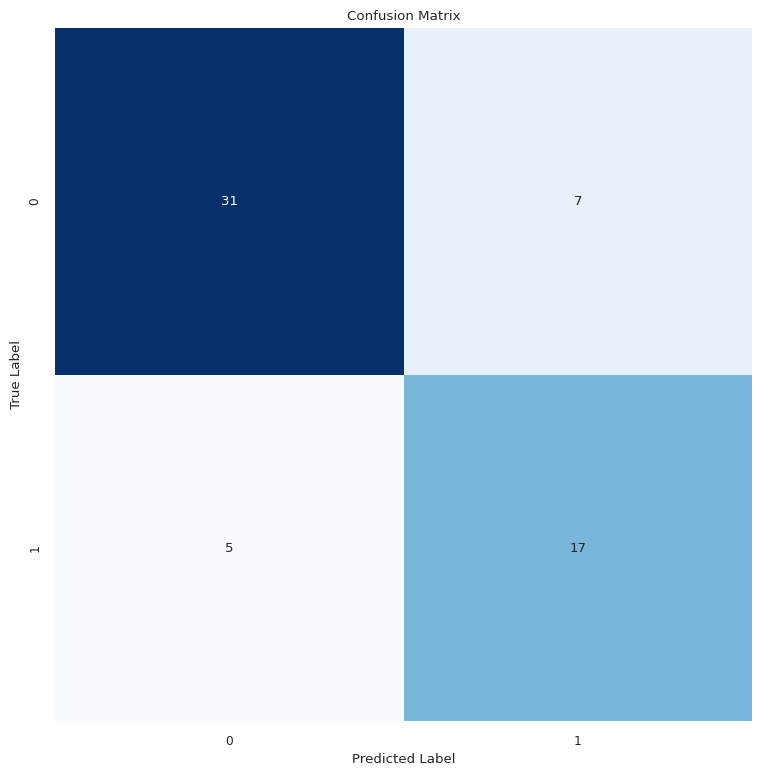

In [ ]:
matriz_confusão=metrics.confusion_matrix(ytest, y_pred)

plt.figure(figsize=(9,9))
sns.heatmap(matriz_confusão, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Balanceamento de **dados**(ADASYN)

In [ ]:
from imblearn.over_sampling import ADASYN

In [ ]:
asn = ADASYN(n_neighbors=5)

In [ ]:
X_asn,y_asn=asn.fit_resample(x_scaler,y)
print(y_asn)
print(X_asn)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 1 1 1 1 0 0 1 0
 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1
 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0
 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1
 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[[ 1.19294523e+00 -8.71104775e-01  1.65728387e-04 ...  7.35688190e-01
  -6.87681906e-01 -1.62950241e+00]
 [-4.91279276e-01 -8.71104775e-01  7.51463953e+00 ...  7.35688190e-01
  -6.87681906e-01 -

In [ ]:
import numpy as np
np.bincount(y_asn)

array([203, 194])

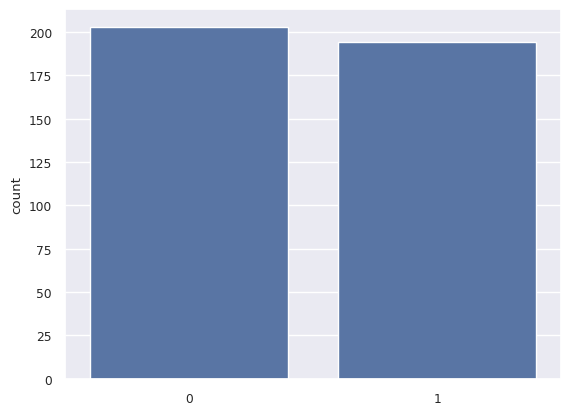

In [ ]:
ax=sns.countplot(x=y_asn)

## dados balanceados

In [ ]:
le.processingle = preprocessing.LabelEncoder()
y2=le.fit_transform(y_asn)
y2

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,

In [ ]:
np.bincount(y2)

array([203, 194])

In [ ]:
dataset_name='infarto'

In [ ]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(X_asn, y2, test_size=0.20)

In [ ]:
x.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time'],
      dtype='object')

## Salvar os conjuntos de test e treinamento em um arquivo

In [ ]:
df_train2=pd.DataFrame(x_train2,columns=x.columns)
df_train2['Class'] = y_train2
df_train2.to_csv('infarto_train.csv',index=False)

In [ ]:
df_train2

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,Class
0,2.792959,-0.871105,0.000166,1.179830,-0.007077,1.359272,7.535660e-09,0.422279,-0.595996,0.735688,-0.687682,-1.332668,1
1,-0.144797,-0.871105,-0.520713,0.947816,-1.433701,-0.735688,-1.989681e+00,0.896623,-0.777847,0.495944,-0.687682,0.167501,1
2,0.771889,-0.871105,-0.517041,1.179830,-0.260991,1.359272,2.761578e+00,-0.090900,0.539054,-1.359272,-0.687682,1.054912,0
3,0.377241,-0.871105,-0.194317,1.179830,-1.126329,-0.641835,1.176945e-02,-0.183388,-0.141976,0.735688,1.454161,0.251447,1
4,-1.164969,-0.871105,0.000166,-0.847579,-1.107370,-0.735688,-1.365806e+00,-0.575031,-0.595996,0.735688,-0.687682,0.912948,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
312,2.203480,1.147968,-0.446842,-0.847579,-0.007077,-0.735688,-1.390846e-02,-0.478205,0.766064,0.735688,-0.687682,-1.500444,1
313,0.098199,1.147968,0.075527,-0.847579,0.162199,-0.735688,2.011661e-01,-0.671857,-0.823006,-1.359272,-0.687682,1.325935,0
314,-0.070223,-0.871105,1.356673,1.179830,-1.107370,-0.735688,1.040981e+00,0.683709,1.674104,-1.359272,-0.687682,0.538678,1
315,-0.491279,-0.871105,7.514640,-0.847579,-0.007077,-0.735688,7.535660e-09,-0.284552,-0.141976,0.735688,-0.687682,-1.603691,1


In [ ]:
df_test2=pd.DataFrame(x_test2,columns=x.columns)
df_test2['Class'] = y_test2
df_test2.to_csv('infarto_test.csv',index=False)

In [ ]:
df_test2

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,Class
0,0.687678,-0.871105,0.000166,-0.847579,-1.530560,-0.735688,2.705813e-02,-0.187726,-0.595996,0.735688,1.454161,-0.739000,1
1,1.133564,1.147968,-0.161755,-0.847579,-1.135483,0.815997,-1.228863e+00,3.262243,-0.764137,0.735688,-0.687682,-1.202188,1
2,-0.912335,1.147968,-0.427227,-0.847579,-0.007077,1.359272,1.294746e-01,-0.284552,0.085034,0.735688,-0.687682,-1.539162,1
3,0.771889,-0.160235,-0.447538,-0.847579,-1.107370,0.001900,-2.234991e-01,-0.255907,1.060234,-1.359272,-0.687682,-1.061077,1
4,-1.754448,-0.871105,-0.348768,-0.847579,0.585389,1.359272,1.192330e-01,-0.478205,0.766064,-1.359272,-0.687682,0.564490,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,0.203736,1.147968,-0.395828,1.179830,-0.289221,1.359272,5.897983e-01,-0.381379,0.378647,-1.359272,-0.687682,-0.844135,1
76,-0.912335,-0.871105,1.305056,1.179830,-0.260991,-0.735688,7.535660e-09,-0.207091,0.085034,0.735688,1.454161,-0.145331,0
77,0.544098,-0.871105,-0.100358,-0.847579,-1.530560,-0.735688,-2.581536e-01,0.124107,-0.897036,0.735688,1.454161,-0.761004,1
78,-0.070223,1.147968,-0.552141,-0.847579,-1.530560,-0.735688,-6.079240e-01,-0.671857,0.539054,0.735688,1.454161,-0.739000,1


In [ ]:
Xt2=pd.read_csv('/content/infarto_train.csv')
yt2=pd.read_csv('/content/infarto_train.csv', usecols=['Class'])

In [ ]:
yt2

,Class
0,1
1,1
2,0
3,1
4,0
...,...
312,1
313,0
314,1
315,1


In [ ]:
Xt2

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,Class
0,2.792959,-0.871105,0.000166,1.179830,-0.007077,1.359272,7.535660e-09,0.422279,-0.595996,0.735688,-0.687682,-1.332668,1
1,-0.144797,-0.871105,-0.520713,0.947816,-1.433701,-0.735688,-1.989681e+00,0.896623,-0.777847,0.495944,-0.687682,0.167501,1
2,0.771889,-0.871105,-0.517041,1.179830,-0.260991,1.359272,2.761578e+00,-0.090900,0.539054,-1.359272,-0.687682,1.054912,0
3,0.377241,-0.871105,-0.194317,1.179830,-1.126329,-0.641835,1.176945e-02,-0.183388,-0.141976,0.735688,1.454161,0.251447,1
4,-1.164969,-0.871105,0.000166,-0.847579,-1.107370,-0.735688,-1.365806e+00,-0.575031,-0.595996,0.735688,-0.687682,0.912948,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
312,2.203480,1.147968,-0.446842,-0.847579,-0.007077,-0.735688,-1.390846e-02,-0.478205,0.766064,0.735688,-0.687682,-1.500444,1
313,0.098199,1.147968,0.075527,-0.847579,0.162199,-0.735688,2.011661e-01,-0.671857,-0.823006,-1.359272,-0.687682,1.325935,0
314,-0.070223,-0.871105,1.356673,1.179830,-1.107370,-0.735688,1.040981e+00,0.683709,1.674104,-1.359272,-0.687682,0.538678,1
315,-0.491279,-0.871105,7.514640,-0.847579,-0.007077,-0.735688,7.535660e-09,-0.284552,-0.141976,0.735688,-0.687682,-1.603691,1


In [ ]:
import pandas as pd
Xt2=pd.read_csv('/content/infarto_train.csv')

yt2=pd.read_csv('/content/infarto_train.csv', usecols=['Class'])
print("Total NaNs (X):", Xt2.isnull().sum().sum())
Xt2.isnull().sum()


Xt2.info()
yt2['Class'].value_counts()


Total NaNs (X): 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317 entries, 0 to 316
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       317 non-null    float64
 1   anaemia                   317 non-null    float64
 2   creatinine_phosphokinase  317 non-null    float64
 3   diabetes                  317 non-null    float64
 4   ejection_fraction         317 non-null    float64
 5   high_blood_pressure       317 non-null    float64
 6   platelets                 317 non-null    float64
 7   serum_creatinine          317 non-null    float64
 8   serum_sodium              317 non-null    float64
 9   sex                       317 non-null    float64
 10  smoking                   317 non-null    float64
 11  time                      317 non-null    float64
 12  Class                     317 non-null    int64  
dtypes: float64(12), int64(1)
memory usage: 32.3 KB


,count
Class,
0,164
1,153


In [ ]:
xt2=Xt2.drop(columns=['Class'])

In [ ]:
xt2

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,2.792959,-0.871105,0.000166,1.179830,-0.007077,1.359272,7.535660e-09,0.422279,-0.595996,0.735688,-0.687682,-1.332668
1,-0.144797,-0.871105,-0.520713,0.947816,-1.433701,-0.735688,-1.989681e+00,0.896623,-0.777847,0.495944,-0.687682,0.167501
2,0.771889,-0.871105,-0.517041,1.179830,-0.260991,1.359272,2.761578e+00,-0.090900,0.539054,-1.359272,-0.687682,1.054912
3,0.377241,-0.871105,-0.194317,1.179830,-1.126329,-0.641835,1.176945e-02,-0.183388,-0.141976,0.735688,1.454161,0.251447
4,-1.164969,-0.871105,0.000166,-0.847579,-1.107370,-0.735688,-1.365806e+00,-0.575031,-0.595996,0.735688,-0.687682,0.912948
...,...,...,...,...,...,...,...,...,...,...,...,...
312,2.203480,1.147968,-0.446842,-0.847579,-0.007077,-0.735688,-1.390846e-02,-0.478205,0.766064,0.735688,-0.687682,-1.500444
313,0.098199,1.147968,0.075527,-0.847579,0.162199,-0.735688,2.011661e-01,-0.671857,-0.823006,-1.359272,-0.687682,1.325935
314,-0.070223,-0.871105,1.356673,1.179830,-1.107370,-0.735688,1.040981e+00,0.683709,1.674104,-1.359272,-0.687682,0.538678
315,-0.491279,-0.871105,7.514640,-0.847579,-0.007077,-0.735688,7.535660e-09,-0.284552,-0.141976,0.735688,-0.687682,-1.603691


In [ ]:
from scipy.optimize import differential_evolution as de


n_splits = 5
list_results=[]

for run in range(30):
        random_seed=run*10+100

        lb_rdf = [5, 2, 2]
        ub_rdf = [30, 10, 10]

        lb_ann = [0.0, 0.0001, 1,  5,  5,  5]
        ub_ann = [1.0, 0.1,    2, 15, 15, 15]



        print('='*80+'\n'+dataset_name+'\n'+'='*80+'\n')


        args = (xt2, yt2['Class'], 'eval', n_splits, random_seed)

        optimizers=[

            ('DT'  , lb_rdf, ub_rdf, fun_random_florest, args, random_seed,),
            ('ANN'  , lb_ann, ub_ann, fun_ann_fs, args, random_seed,),
            ]

        for (clf_name, lb, ub, fun, args, random_seed) in optimizers:
            print(clf_name, fun, random_seed)


            res = de(func=fun, bounds=tuple(zip(lb,ub)), args=args, maxiter=10, popsize=10, seed=run, disp=True, polish=False)
            xopt, fopt = res['x'], res['fun']

            print(run, fopt, xopt)

            sim = fun(xopt, *(xt2, yt2['Class'], 'run', n_splits, random_seed))

            sim['Y_TRUE'] = sim['Y_TRUE']
            sim['Y_PRED'] = sim['Y_PRED']
            sim['RUN']=run
            sim['ACCURACY'] = accuracy_score(sim['Y_TRUE'], sim['Y_PRED'])
            sim['F1'] = f1_score(sim['Y_TRUE'], sim['Y_PRED'], average ='weighted')
            sim['RECALL'] = recall_score(sim['Y_TRUE'], sim['Y_PRED'], average ='weighted')


            list_results.append(sim)

data = pd.DataFrame(list_results)
data.to_csv("resultados2.csv",index=False)

infarto

DT <function fun_random_florest at 0x7cb48c235940> 100
differential_evolution step 1: f(x)= -0.8958990536277602
differential_evolution step 2: f(x)= -0.8958990536277602
differential_evolution step 3: f(x)= -0.8958990536277602
0 -0.8958990536277602 [18.05886489  8.96499406  4.78830676]
ANN <function fun_ann_fs at 0x7cb48c234680> 100
differential_evolution step 1: f(x)= -0.6435331230283912
differential_evolution step 2: f(x)= -0.6435331230283912
differential_evolution step 3: f(x)= -0.6435331230283912
differential_evolution step 4: f(x)= -0.6435331230283912
differential_evolution step 5: f(x)= -0.6529968454258676
differential_evolution step 6: f(x)= -0.6529968454258676
differential_evolution step 7: f(x)= -0.6529968454258676
differential_evolution step 8: f(x)= -0.6529968454258676
differential_evolution step 9: f(x)= -0.6529968454258676
differential_evolution step 10: f(x)= -0.6529968454258676
0 -0.6529968454258676 [ 0.1782385   0.02326773  1.80614308 12.47900558 11.63439461  6.

In [ ]:
resultados2 = pd.read_csv("resultados2.csv")

In [ ]:
resultados2

,Y_TRUE,Y_PRED,BEST_PARAMS,PARAMS,EST_NAME,ESTIMATOR,DATA,SEED,RUN,ACCURACY,F1,RECALL
0,0 1\n1 1\n2 0\n3 1\n4 ...,[1 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 1 1 0 1 1 1...,"{'n_estimators': 18, 'max_depth': 8, 'min_samp...",[18.05886489 8.96499406 4.78830676],DT,"RandomForestClassifier(max_depth=8, min_sample...",age anaemia creatinine_phosphokin...,100,0,0.895899,0.895924,0.895899
1,0 1\n1 1\n2 0\n3 1\n4 ...,[1 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 1 1 1 0 0 1 0...,"{'activation': 'tanh', 'hidden_layer_sizes': (...",[ 0.1782385 0.02326773 1.80614308 12.479005...,ANN,"MLPClassifier(activation='tanh', alpha=np.floa...",age anaemia creatinine_phosphokin...,100,0,0.652997,0.647023,0.652997
2,0 1\n1 1\n2 0\n3 1\n4 ...,[1 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 1 1 1 0 1 1 1...,"{'n_estimators': 14, 'max_depth': 9, 'min_samp...",[14.61097107 9.04172662 6.6498717 ],DT,"RandomForestClassifier(max_depth=9, min_sample...",age anaemia creatinine_phosphokin...,110,1,0.870662,0.870608,0.870662
3,0 1\n1 1\n2 0\n3 1\n4 ...,[1 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0...,"{'activation': 'relu', 'hidden_layer_sizes': (...",[7.33656901e-01 7.64611044e-03 1.54681717e+00 ...,ANN,MLPClassifier(alpha=np.float64(0.0076461104407...,age anaemia creatinine_phosphokin...,110,1,0.678233,0.673745,0.678233
4,0 1\n1 1\n2 0\n3 1\n4 ...,[1 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 1 1 0 1 1 1...,"{'n_estimators': 15, 'max_depth': 6, 'min_samp...",[15.66136455 6.63102464 7.73975117],DT,"RandomForestClassifier(max_depth=6, min_sample...",age anaemia creatinine_phosphokin...,120,2,0.880126,0.880160,0.880126
5,0 1\n1 1\n2 0\n3 1\n4 ...,[1 1 0 0 0 0 0 0 1 1 0 1 1 0 1 0 1 1 1 0 1 1 1...,"{'activation': 'relu', 'hidden_layer_sizes': (...",[ 0.51945719 0.06351946 1.76561719 5.948528...,ANN,MLPClassifier(alpha=np.float64(0.0635194586704...,age anaemia creatinine_phosphokin...,120,2,0.712934,0.711697,0.712934
6,0 1\n1 1\n2 0\n3 1\n4 ...,[1 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 1 1 1 0 1 1 1...,"{'n_estimators': 14, 'max_depth': 8, 'min_samp...",[14.14666285 8.96002783 3.48236109],DT,"RandomForestClassifier(max_depth=8, min_sample...",age anaemia creatinine_phosphokin...,130,3,0.886435,0.886435,0.886435
7,0 1\n1 1\n2 0\n3 1\n4 ...,[1 1 0 1 0 1 1 0 1 0 0 1 1 0 1 0 1 1 1 0 1 1 1...,"{'activation': 'tanh', 'hidden_layer_sizes': (...",[ 0.34406562 0.07352098 1.78752839 14.834449...,ANN,"MLPClassifier(activation='tanh', alpha=np.floa...",age anaemia creatinine_phosphokin...,130,3,0.703470,0.703500,0.703470
8,0 1\n1 1\n2 0\n3 1\n4 ...,[1 1 0 1 1 0 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 1 1...,"{'n_estimators': 25, 'max_depth': 9, 'min_samp...",[25.74482608 9.17135014 4.17828797],DT,"RandomForestClassifier(max_depth=9, min_sample...",age anaemia creatinine_phosphokin...,140,4,0.873817,0.873855,0.873817
9,0 1\n1 1\n2 0\n3 1\n4 ...,[1 1 0 1 1 0 0 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1...,"{'activation': 'tanh', 'hidden_layer_sizes': (...",[ 0.30456673 0.03894919 1.90189614 11.405329...,ANN,"MLPClassifier(activation='tanh', alpha=np.floa...",age anaemia creatinine_phosphokin...,140,4,0.703470,0.685383,0.703470


In [ ]:
df_dt2 = resultados[resultados["EST_NAME"] == 'DT']

In [ ]:
df_ann2 = resultados[resultados["EST_NAME"] == 'ANN']

In [ ]:
df_dt2["ACCURACY"].mean()

np.float64(0.8465829846582988)

In [ ]:
df_ann2["ACCURACY"].mean()

np.float64(0.7341701534170152)

In [ ]:
df_dt2.sort_values(by=["ACCURACY"],ascending=False)

,Y_TRUE,Y_PRED,BEST_PARAMS,PARAMS,EST_NAME,ESTIMATOR,DATA,SEED,RUN,ACCURACY,F1,RECALL
0,0 0\n1 1\n2 1\n3 0\n4 ...,[0 1 1 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0...,"{'n_estimators': 11, 'max_depth': 5, 'min_samp...",[11.03768675 5.45275994 7.33934208],DT,"RandomForestClassifier(max_depth=5, min_sample...",age anaemia creatinine_phosphokin...,100,0,0.861925,0.857140,0.861925
2,0 0\n1 1\n2 1\n3 0\n4 ...,[0 1 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0...,"{'n_estimators': 10, 'max_depth': 3, 'min_samp...",[10.14311214 3.47522023 4.48653462],DT,"RandomForestClassifier(max_depth=3, min_sample...",age anaemia creatinine_phosphokin...,110,1,0.861925,0.855515,0.861925
24,0 0\n1 1\n2 1\n3 0\n4 ...,[0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0...,"{'n_estimators': 17, 'max_depth': 6, 'min_samp...",[17.85337704 6.70298667 7.73139661],DT,"RandomForestClassifier(max_depth=6, min_sample...",age anaemia creatinine_phosphokin...,220,12,0.861925,0.857893,0.861925
4,0 0\n1 1\n2 1\n3 0\n4 ...,[0 1 1 0 0 0 0 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0...,"{'n_estimators': 9, 'max_depth': 2, 'min_sampl...",[9.82111262 2.00691366 9.56023251],DT,"RandomForestClassifier(max_depth=2, min_sample...",age anaemia creatinine_phosphokin...,120,2,0.857741,0.851571,0.857741
50,0 0\n1 1\n2 1\n3 0\n4 ...,[0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0...,"{'n_estimators': 15, 'max_depth': 5, 'min_samp...",[15.46603505 5.01061449 7.52334713],DT,"RandomForestClassifier(max_depth=5, min_sample...",age anaemia creatinine_phosphokin...,350,25,0.857741,0.853204,0.857741
36,0 0\n1 1\n2 1\n3 0\n4 ...,[0 1 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0...,"{'n_estimators': 22, 'max_depth': 7, 'min_samp...",[22.22065123 7.20417173 8.75364365],DT,"RandomForestClassifier(max_depth=7, min_sample...",age anaemia creatinine_phosphokin...,280,18,0.857741,0.854678,0.857741
52,0 0\n1 1\n2 1\n3 0\n4 ...,[0 1 1 0 0 0 0 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0...,"{'n_estimators': 27, 'max_depth': 8, 'min_samp...",[27.31629766 8.05608832 6.24167367],DT,"RandomForestClassifier(max_depth=8, min_sample...",age anaemia creatinine_phosphokin...,360,26,0.857741,0.853960,0.857741
54,0 0\n1 1\n2 1\n3 0\n4 ...,[0 1 1 0 0 0 0 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0...,"{'n_estimators': 10, 'max_depth': 4, 'min_samp...",[10.12588356 4.48151549 6.67518993],DT,"RandomForestClassifier(max_depth=4, min_sample...",age anaemia creatinine_phosphokin...,370,27,0.853556,0.849281,0.853556
14,0 0\n1 1\n2 1\n3 0\n4 ...,[0 1 1 0 0 0 0 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0...,"{'n_estimators': 18, 'max_depth': 3, 'min_samp...",[18.77908741 3.46546069 6.24171287],DT,"RandomForestClassifier(max_depth=3, min_sample...",age anaemia creatinine_phosphokin...,170,7,0.853556,0.846758,0.853556
16,0 0\n1 1\n2 1\n3 0\n4 ...,[0 1 1 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0...,"{'n_estimators': 24, 'max_depth': 5, 'min_samp...",[24.58390908 5.02071073 6.24027203],DT,"RandomForestClassifier(max_depth=5, min_sample...",age anaemia creatinine_phosphokin...,180,8,0.853556,0.851442,0.853556


In [ ]:
df_ann2.sort_values(by=["ACCURACY"],ascending=False)

,Y_TRUE,Y_PRED,BEST_PARAMS,PARAMS,EST_NAME,ESTIMATOR,DATA,SEED,RUN,ACCURACY,F1,RECALL
33,0 0\n1 1\n2 1\n3 0\n4 ...,[0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0...,"{'activation': 'relu', 'hidden_layer_sizes': (...",[ 0.51049069 0.0587453 1.63551231 12.087626...,ANN,MLPClassifier(alpha=np.float64(0.0587453016134...,age anaemia creatinine_phosphokin...,260,16,0.774059,0.771303,0.774059
21,0 0\n1 1\n2 1\n3 0\n4 ...,[0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0...,"{'activation': 'tanh', 'hidden_layer_sizes': (...",[ 0.02939511 0.07932856 1.50815189 9.808084...,ANN,"MLPClassifier(activation='tanh', alpha=np.floa...",age anaemia creatinine_phosphokin...,200,10,0.761506,0.743916,0.761506
23,0 0\n1 1\n2 1\n3 0\n4 ...,[0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0...,"{'activation': 'tanh', 'hidden_layer_sizes': (...",[ 0.09398678 0.07406967 1.85179311 14.618652...,ANN,"MLPClassifier(activation='tanh', alpha=np.floa...",age anaemia creatinine_phosphokin...,210,11,0.761506,0.743916,0.761506
7,0 0\n1 1\n2 1\n3 0\n4 ...,[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0...,"{'activation': 'relu', 'hidden_layer_sizes': (...",[ 0.52333783 0.0455733 1.62165947 11.772754...,ANN,MLPClassifier(alpha=np.float64(0.0455733011037...,age anaemia creatinine_phosphokin...,130,3,0.757322,0.730255,0.757322
17,0 0\n1 1\n2 1\n3 0\n4 ...,[0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0...,"{'activation': 'tanh', 'hidden_layer_sizes': (...",[ 0.03432558 0.04869812 1.91162726 6.618053...,ANN,"MLPClassifier(activation='tanh', alpha=np.floa...",age anaemia creatinine_phosphokin...,180,8,0.753138,0.736743,0.753138
37,0 0\n1 1\n2 1\n3 0\n4 ...,[0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0...,"{'activation': 'relu', 'hidden_layer_sizes': (...",[ 0.64372706 0.07122492 1.64285948 14.427532...,ANN,MLPClassifier(alpha=np.float64(0.0712249229099...,age anaemia creatinine_phosphokin...,280,18,0.748954,0.727502,0.748954
15,0 0\n1 1\n2 1\n3 0\n4 ...,[0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0...,"{'activation': 'tanh', 'hidden_layer_sizes': (...",[ 0.39247629 0.08687491 1.90301221 14.140769...,ANN,"MLPClassifier(activation='tanh', alpha=np.floa...",age anaemia creatinine_phosphokin...,170,7,0.744770,0.750437,0.744770
31,0 0\n1 1\n2 1\n3 0\n4 ...,[0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0...,"{'activation': 'tanh', 'hidden_layer_sizes': (...",[ 0.07431555 0.07740751 1.64545308 14.599056...,ANN,"MLPClassifier(activation='tanh', alpha=np.floa...",age anaemia creatinine_phosphokin...,250,15,0.740586,0.714017,0.740586
53,0 0\n1 1\n2 1\n3 0\n4 ...,[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...,"{'activation': 'relu', 'hidden_layer_sizes': (...",[ 0.66832696 0.02051631 1.51982349 14.170472...,ANN,MLPClassifier(alpha=np.float64(0.0205163063339...,age anaemia creatinine_phosphokin...,360,26,0.740586,0.691475,0.740586
55,0 0\n1 1\n2 1\n3 0\n4 ...,[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0...,"{'activation': 'relu', 'hidden_layer_sizes': (...",[ 0.768851 0.0691332 1.69168015 8.934988...,ANN,MLPClassifier(alpha=np.float64(0.0691332023775...,age anaemia creatinine_phosphokin...,370,27,0.736402,0.669019,0.736402


In [ ]:
melhor_parametro_dt2 = resultados2[resultados2["EST_NAME"] == "DT"].sort_values(by="ACCURACY", ascending=False).iloc[0]
melhor_parametro_dt2.loc['BEST_PARAMS']

"{'n_estimators': 24, 'max_depth': 9, 'min_samples_split': 2}"

In [ ]:
melhor_parametro_ann2 = resultados2[resultados2["EST_NAME"] == "ANN"].sort_values(by="ACCURACY", ascending=False).iloc[0]
melhor_parametro_ann2.loc['BEST_PARAMS']

"{'activation': 'tanh', 'hidden_layer_sizes': (14, 10), 'alpha': np.float64(0.09467928467776904)}"

In [ ]:
from scipy.stats import wilcoxon

In [ ]:
t_dt2,p_dt2 = wilcoxon(df_dt2["ACCURACY"].values,df_ann2["ACCURACY"].values)

In [ ]:
t_ann2,p_ann2 = wilcoxon(df_ann2["ACCURACY"].values,df_ann2["ACCURACY"].values)

/usr/local/lib/python3.12/dist-packages/scipy/stats/_wilcoxon.py:178: RuntimeWarning: invalid value encountered in scalar divide
  z = (r_plus - mn) / se


In [ ]:
p_dt2

np.float64(1.7105279932400777e-06)

In [ ]:
p_ann2

np.float64(nan)

In [ ]:
Xtrain2 = pd.read_csv('dftrain.csv')
ytrain2 = pd.read_csv('dftrain.csv', usecols=['Class'])
Xtest2 = pd.read_csv('dftest.csv')
ytest2 = pd.read_csv('dftest.csv', usecols=['Class'])

In [ ]:
X_test2=Xtest2.drop(columns=['Class'])
X_test2

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,-0.070223,-0.871105,0.325356,1.179830,0.585389,-0.735688,3.445492e-01,-0.381379,-0.823006,0.735688,-0.687682,-0.648659
1,0.350833,1.147968,-0.285795,-0.847579,-1.107370,-0.735688,3.547908e-01,-0.284552,0.993074,0.735688,-0.687682,-0.558318
2,-1.754448,1.147968,-0.496394,-0.847579,0.162199,-0.735688,-3.826077e-01,-0.575031,0.993074,-1.359272,-0.687682,0.732266
3,-0.828124,-0.871105,0.823981,-0.847579,-1.107370,1.359272,7.826636e-02,-0.478205,-1.504036,0.735688,-0.687682,-1.190704
4,0.771889,-0.871105,2.181521,1.179830,0.162199,-0.735688,-2.289830e-01,-0.381379,0.085034,0.735688,-0.687682,1.506616
5,-0.070223,-0.871105,-0.530462,-0.847579,-1.530560,-0.735688,-1.478464e+00,1.458319,-2.185066,0.735688,1.454161,-0.855152
6,-0.238646,1.147968,-0.450971,-0.847579,-1.107370,-0.735688,-4.542993e-01,-0.187726,0.085034,0.735688,1.454161,0.512867
7,0.350833,-0.871105,-0.428259,-0.847579,-0.684180,-0.735688,-4.463340e-02,-0.575031,0.312044,-1.359272,-0.687682,0.719360
8,1.192945,1.147968,-0.391095,1.179830,-0.007077,1.359272,2.011661e-01,-0.768683,-1.277026,0.735688,1.454161,-0.726094
9,1.192945,1.147968,-0.346704,-0.847579,-1.953749,-0.735688,-1.396531e+00,-0.187726,0.085034,0.735688,-0.687682,-1.552067


In [ ]:
X_train2=Xtrain2.drop(columns=['Class'])
X_train2

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,-1.586025,1.147968,-0.511880,-0.847579,-0.260991,-0.735688,1.040981,-0.284552,0.539054,0.735688,1.454161,0.912948
1,1.192945,1.147968,-0.517041,-0.847579,-0.007077,1.359272,1.071706,2.523407,-1.277026,0.735688,1.454161,-1.552067
2,0.350833,1.147968,-0.468521,1.179830,-0.684180,1.359272,0.344549,0.199578,-0.141976,-1.359272,-0.687682,-1.423009
3,0.350833,1.147968,-0.539753,1.179830,1.854958,-0.735688,-0.935657,-0.478205,0.085034,-1.359272,-0.687682,-0.300201
4,-0.491279,-0.871105,-0.253792,-0.847579,0.585389,1.359272,0.621074,-0.478205,0.766064,-1.359272,-0.687682,-0.726094
...,...,...,...,...,...,...,...,...,...,...,...,...
234,-1.249180,1.147968,-0.300248,-0.847579,-0.260991,-0.735688,0.866873,-0.478205,0.766064,-1.359272,-0.687682,-0.274389
235,-1.333392,1.147968,-0.532527,1.179830,-1.107370,-0.735688,-0.310916,-0.575031,-0.368986,0.735688,-0.687682,1.287217
236,-0.070223,-0.871105,-0.539753,-0.847579,-1.107370,1.359272,-0.525991,2.039276,-0.141976,0.735688,1.454161,0.732266
237,0.771889,-0.871105,0.037330,-0.847579,-0.260991,-0.735688,0.651799,-0.284552,1.220084,-1.359272,-0.687682,1.480805


In [ ]:
BEST_PARAMS_DT2 = ast.literal_eval(melhor_parametro_dt2['BEST_PARAMS'])
BEST_PARAMS_DT2

{'n_estimators': 24, 'max_depth': 9, 'min_samples_split': 2}

In [ ]:
clf2 = RandomForestClassifier(**BEST_PARAMS_DT2)
clf2

RandomForestClassifier(max_depth=9, n_estimators=24)

In [ ]:
clf2.fit(X_train2, ytrain2)

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(max_depth=9, n_estimators=24)

In [ ]:
y_pred2=clf.predict(X_test2)

In [ ]:
accuracy_score(ytest2, y_pred2)

0.8666666666666667

In [ ]:
BEST_PARAMS_ANN2=eval(melhor_parametro_ann2['BEST_PARAMS'])
BEST_PARAMS_ANN2

{'activation': 'tanh',
 'hidden_layer_sizes': (14, 10),
 'alpha': np.float64(0.09467928467776904)}

In [ ]:
clf3=MLPClassifier(**BEST_PARAMS_ANN2)

In [ ]:
clf3.fit(X_train2, ytrain2['Class'])

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='tanh', alpha=np.float64(0.09467928467776904),
              hidden_layer_sizes=(14, 10))

In [ ]:
y_pred=clf3.predict(X_test2)

In [ ]:
accuracy_score(ytest2, y_pred2)

0.8666666666666667

# Desvio das métricas 2

## Para o classificador mlp

In [ ]:
acc_std=df_ann2['ACCURACY'].std()
acc_std

0.015722165972293145

In [ ]:
f1_std=df_ann2['F1'].std()
f1_std

0.034140544690176904

In [ ]:
recall_std=df_ann2['RECALL'].std()
recall_std

0.015722165972293145

## Para o classificador Random florest

In [ ]:
acc_std=df_dt2['ACCURACY'].std()
acc_std

0.010030613001786266

In [ ]:
f1_std=df_dt2['F1'].std()
f1_std

0.010716227392534342

In [ ]:
recall_std=df_dt2['RECALL'].std()
recall_std

0.010030613001786266

# Média das métricas 2

## Para o mlp

In [ ]:
media_acuracia=df_ann2['ACCURACY'].mean()
media_acuracia

np.float64(0.7341701534170152)

In [ ]:
media_f1=df_ann2['F1'].mean()
media_f1

np.float64(0.7069882038817791)

In [ ]:
media_recall=df_ann2['RECALL'].mean()
media_recall

np.float64(0.7341701534170152)

## Para o Random florest

In [ ]:
media_acuracia=df_dt2['ACCURACY'].mean()
media_acuracia

np.float64(0.8465829846582988)

In [ ]:
media_f1=df_dt2['F1'].mean()
media_f1

np.float64(0.8418390629227825)

In [ ]:
media_recall=df_dt2['RECALL'].mean()
media_recall

np.float64(0.8465829846582988)

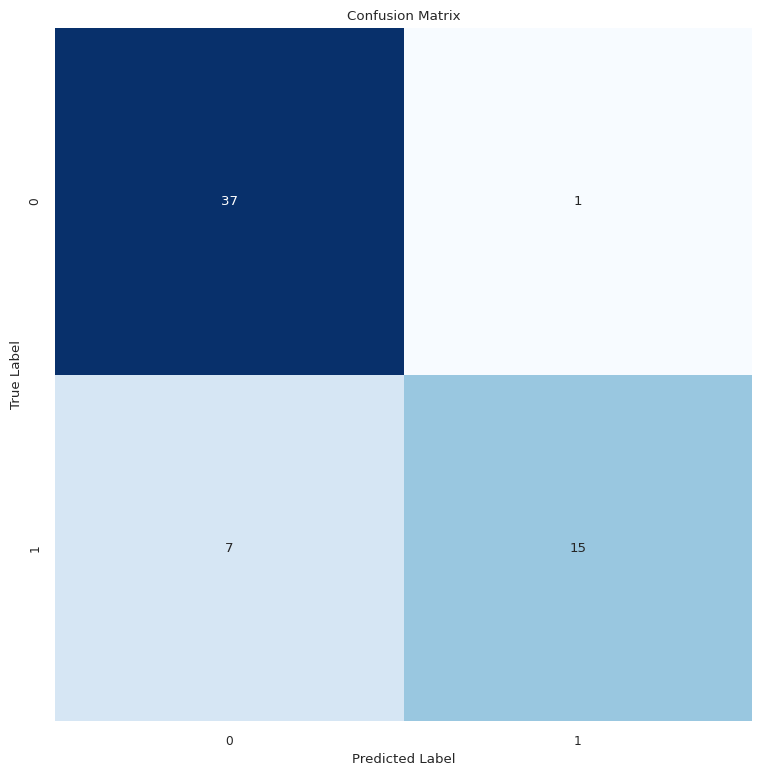

In [ ]:
matriz_confusão=metrics.confusion_matrix(ytest2, y_pred2)

plt.figure(figsize=(9,9))
sns.heatmap(matriz_confusão, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()